In [97]:
import torch

#run_name = 'nograd_half_vanilla_200_cocoercivity_lr0001'
run_name = 'convergence_to_inf'
tensor_limit = torch.load(run_name+'_limit.pt')
tensor_neighbor = torch.load(run_name+'_neighbor.pt')
tensor_z0_NMSE = torch.load(run_name+'_z0_NMSE.pt')
print(tensor_limit.shape)

torch.Size([100, 100])


In [98]:
min_beta_limit, _ = torch.min(tensor_limit[:,:100], dim=-1)
min_beta_neighbor, _ = torch.min(tensor_neighbor[:,:100], dim=-1)

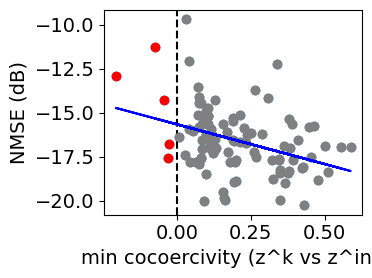

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4, 3))
plt.plot(min_beta_limit.numpy(), 10*np.log10(tensor_z0_NMSE.numpy()), 'o')  # x와 y 좌표를 넘파이 배열로 변환하여 plot 함수에 전달
plt.xlabel('min cocoercivity (z^k vs z^inf)')  # x 축 레이블
plt.ylabel('NMSE (dB)')  # y 축 레이블
plt.title('')  # 그래프 제목

# 추세선 추가
z = np.polyfit(min_beta_limit.numpy(), 10*np.log10(tensor_z0_NMSE.numpy()), 1)
p = np.poly1d(z)

plt.axvline(x=0.0, color='black', linestyle='--')
#plt.grid(True)  # 그리드 표시

# x<0 인 점들을 다른 색으로 강조
for x, y in zip(min_beta_limit.numpy(), 10*np.log10(tensor_z0_NMSE.numpy())):
    if x < 0:
        plt.plot(x, y, 'ro')  # 빨간색으로 표시
    else:
        plt.plot(x, y, color='gray', marker='o')  # 파란색으로 표시

plt.plot(min_beta_limit.numpy(), (p(min_beta_limit.numpy())), 'b-')

plt.tight_layout()
plt.savefig('/home/sonic/Pictures/cocoercivity_inf_'+run_name+'.pdf')
plt.savefig('/home/sonic/Pictures/cocoercivity_inf_'+run_name+'.png')
plt.show() 

In [100]:
negative_indices = (tensor_limit[:,:100] < 0).nonzero()
#print(negative_indices)

In [101]:
data = 10*np.log10(tensor_z0_NMSE.numpy())

standard_error = np.std(data) / np.sqrt(len(data))  
print(standard_error) 

0.1857689142227173


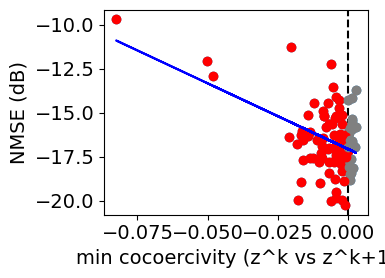

In [102]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4, 3))
plt.plot(min_beta_neighbor.numpy(), 10*np.log10(tensor_z0_NMSE.numpy()), 'o')  # x와 y 좌표를 넘파이 배열로 변환하여 plot 함수에 전달
plt.xlabel('min cocoercivity (z^k vs z^k+1)')  # x 축 레이블
plt.ylabel('NMSE (dB)')  # y 축 레이블
plt.title('')  # 그래프 제목

# 추세선 추가
z = np.polyfit(min_beta_neighbor.numpy(), 10*np.log10(tensor_z0_NMSE.numpy()), 1)
p = np.poly1d(z)

plt.axvline(x=0.0, color='black', linestyle='--')
#plt.grid(True)  # 그리드 표시

# x<0 인 점들을 다른 색으로 강조
for x, y in zip(min_beta_neighbor.numpy(), 10*np.log10(tensor_z0_NMSE.numpy())):
    if x < 0:
        plt.plot(x, y, 'ro')  # 빨간색으로 표시
    else:
        plt.plot(x, y, color='gray', marker='o')  # 파란색으로 표시

plt.plot(min_beta_neighbor.numpy(), (p(min_beta_neighbor.numpy())), 'b-')

plt.tight_layout()
plt.savefig('/home/sonic/Pictures/cocoercivity_k+1_'+run_name+'.pdf')
plt.savefig('/home/sonic/Pictures/cocoercivity_k+1_'+run_name+'.png')
plt.show() 

In [5]:
tensor_dist_neighbor[:,90:100].shape

torch.Size([100, 10])

In [9]:
tensor_dist_neighbor[:,290:300]

tensor([[0.0537, 0.0483, 0.0430, 0.0376, 0.0323, 0.0269, 0.0216, 0.0162, 0.0109,
         0.0000],
        [0.0784, 0.0704, 0.0626, 0.0548, 0.0470, 0.0392, 0.0315, 0.0236, 0.0158,
         0.0000],
        [0.0801, 0.0723, 0.0644, 0.0565, 0.0486, 0.0405, 0.0324, 0.0245, 0.0163,
         0.0000],
        [0.0565, 0.0509, 0.0451, 0.0395, 0.0338, 0.0282, 0.0226, 0.0171, 0.0115,
         0.0000],
        [0.0936, 0.0842, 0.0749, 0.0654, 0.0560, 0.0466, 0.0372, 0.0279, 0.0188,
         0.0000],
        [0.0774, 0.0696, 0.0618, 0.0540, 0.0463, 0.0387, 0.0310, 0.0232, 0.0155,
         0.0000],
        [0.0536, 0.0482, 0.0428, 0.0375, 0.0322, 0.0269, 0.0215, 0.0161, 0.0107,
         0.0000],
        [0.0682, 0.0612, 0.0544, 0.0476, 0.0408, 0.0339, 0.0272, 0.0205, 0.0137,
         0.0000],
        [0.0989, 0.0891, 0.0793, 0.0696, 0.0597, 0.0499, 0.0399, 0.0300, 0.0200,
         0.0000],
        [0.0773, 0.0695, 0.0617, 0.0540, 0.0464, 0.0386, 0.0310, 0.0233, 0.0156,
         0.0000],
        [0

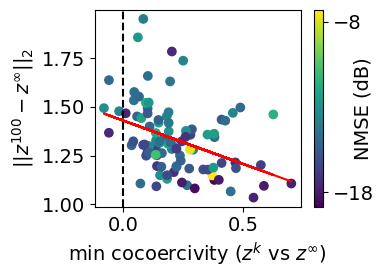

In [9]:
# vanila
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

timestamp = "20240505-150848"
# timestamp = "20240505-180123" # momentum

# loading NMSE, I must do this from wandb
excel = pd.read_csv(timestamp + ".csv")
tensor_z0_NMSE = torch.Tensor(excel["error_middle"])
z0_NMSE_dB = 10*np.log10(tensor_z0_NMSE.numpy())


### edit from here
tensor_limit = torch.load("z300_vanila_inf_20240509-120324.pt")
min_beta_limit, _ = torch.min(tensor_limit[:,:100], dim=-1)

tensor_dist_neighbor = torch.load("z300_vanila_z_list_20240509-120324.pt")
yy = torch.sum(torch.sqrt(tensor_dist_neighbor[:,99:100]),dim=-1)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4, 3))

# Use normalized_z0_NMSE for color mapping
scatter = plt.scatter(min_beta_limit.numpy(), yy.numpy(), c=z0_NMSE_dB, cmap='viridis')
cbar = plt.colorbar(scatter)#, label='NMSE (dB)')
cbar.set_label('NMSE (dB)', labelpad=-15)  # Adjust labelpad here

# Set the colorbar ticker and formatter
# tick_locator = ticker.MaxNLocator(nbins=2)
# cbar.locator = tick_locator
# cbar.update_ticks()
ticks = [np.ceil(np.min(z0_NMSE_dB)), np.floor(np.max(z0_NMSE_dB))]
cbar.set_ticks(ticks)
#cbar.set_ticklabels(['-24', '-12'])

plt.xlabel(r'min cocoercivity ($z^k$ vs $z^{\infty}$)')
# plt.ylabel(r'$\Sigma_{k=90}^{99} || z^{k+1} - z^\infty ||_2$')
plt.ylabel(r'$|| z^{100} - z^\infty ||_2$')
plt.title('')
plt.axvline(x=0.0, color='black', linestyle='--')

# Fit trend line
z = np.polyfit(min_beta_limit.numpy(), yy.numpy(), 1)
p = np.poly1d(z)
plt.plot(min_beta_limit.numpy(), p(min_beta_limit.numpy()), 'r-')

plt.tight_layout()
plt.savefig('./cocoercivity_flow_revised_vanila.pdf')
plt.show()

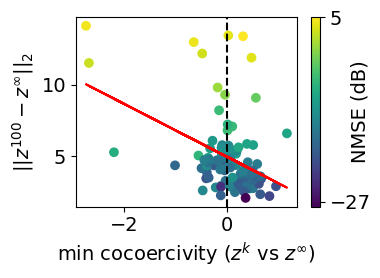

In [10]:
# momentum
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


timestamp = "working_km_0513" # momentum

# loading NMSE, I must do this from wandb
excel = pd.read_csv(timestamp + ".csv")
tensor_z0_NMSE = torch.Tensor(excel["error_middle"])
z0_NMSE_dB = 10*np.log10(tensor_z0_NMSE.numpy())


### edit from here
tensor_limit = torch.load("km_vanila_inf_20240513-021032.pt")
min_beta_limit, _ = torch.min(tensor_limit[:,:100], dim=-1)

tensor_dist_neighbor = torch.load("km_z_list_20240513-021032.pt")
yy = torch.sum(torch.sqrt(tensor_dist_neighbor[:,99:100]),dim=-1)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4, 3))

# Use normalized_z0_NMSE for color mapping
scatter = plt.scatter(min_beta_limit.numpy(), yy.numpy(), c=z0_NMSE_dB, cmap='viridis')
cbar = plt.colorbar(scatter)#, label='NMSE (dB)')
cbar.set_label('NMSE (dB)', labelpad=-15)  # Adjust labelpad here

# Set the colorbar ticker and formatter
# tick_locator = ticker.MaxNLocator(nbins=2)
# cbar.locator = tick_locator
# cbar.update_ticks()
ticks = [np.ceil(np.min(z0_NMSE_dB)), np.floor(np.max(z0_NMSE_dB))]
cbar.set_ticks(ticks)
#cbar.set_ticklabels(['-24', '-12'])

plt.xlabel(r'min cocoercivity ($z^k$ vs $z^{\infty}$)')
# plt.ylabel(r'$\Sigma_{k=90}^{99} || z^{k+1} - z^\infty ||_2$')
plt.ylabel(r'$|| z^{100} - z^\infty ||_2$')
plt.title('')
plt.axvline(x=0.0, color='black', linestyle='--')

# Fit trend line
z = np.polyfit(min_beta_limit.numpy(), yy.numpy(), 1)
p = np.poly1d(z)
plt.plot(min_beta_limit.numpy(), p(min_beta_limit.numpy()), 'r-')

plt.tight_layout()
plt.savefig('./cocoercivity_flow_revised_momentum.pdf')
plt.show()

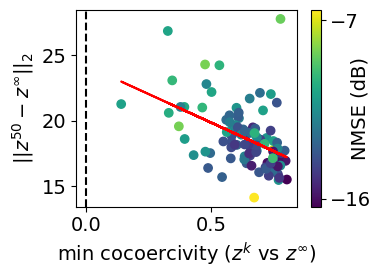

In [21]:
# adam
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


timestamp = "working_adam3" # adam

# loading NMSE, I must do this from wandb
excel = pd.read_csv(timestamp + ".csv")
tensor_z0_NMSE = torch.Tensor(excel["error_middle"])
z0_NMSE_dB = 10*np.log10(tensor_z0_NMSE.numpy())


### edit from here
tensor_limit = torch.load("vanila_inf_20240514-195722.pt")
min_beta_limit, _ = torch.min(tensor_limit[:,:100], dim=-1)

tensor_dist_neighbor = torch.load("z_list_20240514-195722.pt")
yy = torch.sum(tensor_dist_neighbor[:,99:100],dim=-1)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(4, 3))

# Use normalized_z0_NMSE for color mapping
scatter = plt.scatter(min_beta_limit.numpy(), yy.numpy(), c=z0_NMSE_dB, cmap='viridis')
cbar = plt.colorbar(scatter)#, label='NMSE (dB)')
cbar.set_label('NMSE (dB)', labelpad=-15)  # Adjust labelpad here

# Set the colorbar ticker and formatter
# tick_locator = ticker.MaxNLocator(nbins=2)
# cbar.locator = tick_locator
# cbar.update_ticks()
ticks = [np.ceil(np.min(z0_NMSE_dB)), np.floor(np.max(z0_NMSE_dB))]
cbar.set_ticks(ticks)
#cbar.set_ticklabels(['-24', '-12'])

plt.xlabel(r'min cocoercivity ($z^k$ vs $z^{\infty}$)')
# plt.ylabel(r'$\Sigma_{k=90}^{99} || z^{k+1} - z^\infty ||_2$')
plt.ylabel(r'$|| z^{50} - z^\infty ||_2$')
plt.title('')
plt.axvline(x=0.0, color='black', linestyle='--')

# Fit trend line
z = np.polyfit(min_beta_limit.numpy(), yy.numpy(), 1)
p = np.poly1d(z)
plt.plot(min_beta_limit.numpy(), p(min_beta_limit.numpy()), 'r-')

plt.tight_layout()
plt.savefig('./cocoercivity_flow_revised_adam.pdf')
plt.show()